<a href="https://colab.research.google.com/github/MysuraReddyAlla/Machine-Learning-Project/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Gathering

In [74]:
import pandas as pd

In [75]:
import numpy as np

In [76]:
df = pd.read_csv('/content/insurance_claims.csv')

In [77]:
df #dataset

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [78]:
df.shape #no.of rows and columns

(1000, 40)

##Data Preparation

In [79]:
#Intutive Data Modification
df=df.drop(['policy_number','_c39'],axis=1) #used to remove columns that are not useful for fraud detection

In [80]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [81]:
df.columns #used to print columns names

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [82]:
df.dtypes #Used to know the datatype of columns (object is string )

,0
months_as_customer,int64
age,int64
policy_bind_date,object
policy_state,object
policy_csl,object
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,int64
insured_zip,int64
insured_sex,object


In [83]:
df['incident_date'] = pd.to_datetime(df['incident_date']) #used to convert datatype of columns

In [84]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

In [85]:
# Calculate the number of days between the dates
df['days_between_incident_and_bind'] = (df['incident_date'] - df['policy_bind_date']).dt.days

In [86]:
# Convert days to months (approximate)
df['months_between_incident_and_bind'] = df['days_between_incident_and_bind'] / 30.4375

# used to calculate months between incident and bind date

In [87]:
df['months_between_incident_and_bind'] = df['months_between_incident_and_bind'].astype(int) #used to convert datatype of columns

In [88]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,days_between_incident_and_bind,months_between_incident_and_bind
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,100,3
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,3130,102
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,5282,173
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,8996,295
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,256,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,8622,283
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,384,12
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,4358,143
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,1196,39


In [89]:
df['incident_within_customership']=df[['months_between_incident_and_bind','months_as_customer']].apply(lambda x: 1 if x.months_as_customer >= x.months_between_incident_and_bind and x.months_between_incident_and_bind > 0 else 0, axis=1)

In [90]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,days_between_incident_and_bind,months_between_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,100,3,1
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,3130,102,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,5282,173,0
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,8996,295,0
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,256,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,17440,8720,61040,Honda,Accord,2006,N,8622,283,0
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,18080,18080,72320,Volkswagen,Passat,2015,N,384,12,1
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,7500,7500,52500,Suburu,Impreza,1996,N,4358,143,0
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,5220,5220,36540,Audi,A5,1998,N,1196,39,1


In [91]:
df['capital-loss']

,capital-loss
0,0
1,0
2,0
3,-62400
4,-46000
...,...
995,0
996,0
997,0
998,0


In [92]:
df['capital-loss']=df['capital-loss'].abs() #Absolute Value

##Data Quality Checks

In [93]:
df.dtypes #Checking if all data types are correct

,0
months_as_customer,int64
age,int64
policy_bind_date,datetime64[ns]
policy_state,object
policy_csl,object
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,int64
insured_zip,int64
insured_sex,object


In [94]:
#checking negative values are present or not in int or float datatypes in coloumns
dict(df.dtypes)

{'months_as_customer': dtype('int64'),
 'age': dtype('int64'),
 'policy_bind_date': dtype('<M8[ns]'),
 'policy_state': dtype('O'),
 'policy_csl': dtype('O'),
 'policy_deductable': dtype('int64'),
 'policy_annual_premium': dtype('float64'),
 'umbrella_limit': dtype('int64'),
 'insured_zip': dtype('int64'),
 'insured_sex': dtype('O'),
 'insured_education_level': dtype('O'),
 'insured_occupation': dtype('O'),
 'insured_hobbies': dtype('O'),
 'insured_relationship': dtype('O'),
 'capital-gains': dtype('int64'),
 'capital-loss': dtype('int64'),
 'incident_date': dtype('<M8[ns]'),
 'incident_type': dtype('O'),
 'collision_type': dtype('O'),
 'incident_severity': dtype('O'),
 'authorities_contacted': dtype('O'),
 'incident_state': dtype('O'),
 'incident_city': dtype('O'),
 'incident_location': dtype('O'),
 'incident_hour_of_the_day': dtype('int64'),
 'number_of_vehicles_involved': dtype('int64'),
 'property_damage': dtype('O'),
 'bodily_injuries': dtype('int64'),
 'witnesses': dtype('int64'),

In [95]:
for i in dict(df.dtypes):
  print (i) #here i will store columns names

months_as_customer
age
policy_bind_date
policy_state
policy_csl
policy_deductable
policy_annual_premium
umbrella_limit
insured_zip
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
capital-gains
capital-loss
incident_date
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
incident_hour_of_the_day
number_of_vehicles_involved
property_damage
bodily_injuries
witnesses
police_report_available
total_claim_amount
injury_claim
property_claim
vehicle_claim
auto_make
auto_model
auto_year
fraud_reported
days_between_incident_and_bind
months_between_incident_and_bind
incident_within_customership


In [96]:
for i in dict(df.dtypes):
 if (dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==   'float64'):
  print(i , " : ", df[df[i]<0].shape[0]) #for which columns having lessthan zero value (negative value)

months_as_customer  :  0
age  :  0
policy_deductable  :  0
policy_annual_premium  :  0
umbrella_limit  :  1
insured_zip  :  0
capital-gains  :  0
capital-loss  :  0
incident_hour_of_the_day  :  0
number_of_vehicles_involved  :  0
bodily_injuries  :  0
witnesses  :  0
total_claim_amount  :  0
injury_claim  :  0
property_claim  :  0
vehicle_claim  :  0
auto_year  :  0
days_between_incident_and_bind  :  1
months_between_incident_and_bind  :  0
incident_within_customership  :  0


In [97]:
df['umbrella_limit']=df['umbrella_limit'].abs() #Absolute Value

In [98]:
for i in dict(df.dtypes):
 if (dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==   'float64'):
  print(i , " : ", df[df[i]<0].shape[0]) #for which columns having lessthan zero value (negative value)

months_as_customer  :  0
age  :  0
policy_deductable  :  0
policy_annual_premium  :  0
umbrella_limit  :  0
insured_zip  :  0
capital-gains  :  0
capital-loss  :  0
incident_hour_of_the_day  :  0
number_of_vehicles_involved  :  0
bodily_injuries  :  0
witnesses  :  0
total_claim_amount  :  0
injury_claim  :  0
property_claim  :  0
vehicle_claim  :  0
auto_year  :  0
days_between_incident_and_bind  :  1
months_between_incident_and_bind  :  0
incident_within_customership  :  0


In [99]:
#custom data quality check
print (df[df['total_claim_amount'] != df['injury_claim'] + df['property_claim']+ df['vehicle_claim']].shape[0])

0


##Outlier Handling And Missing Values

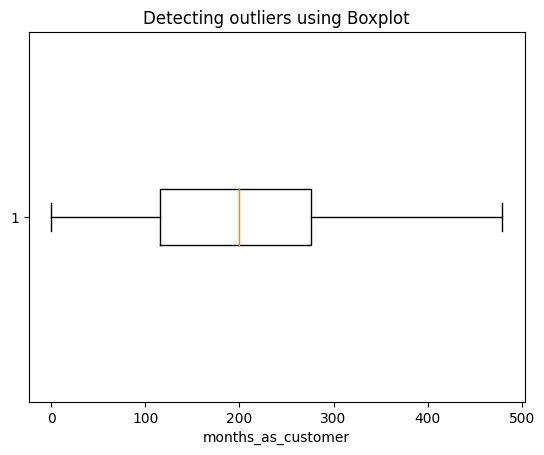

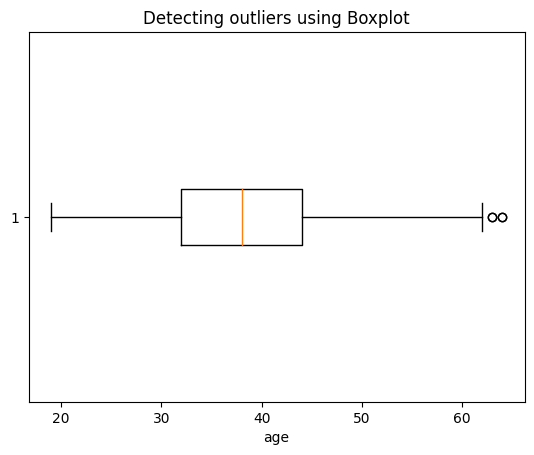

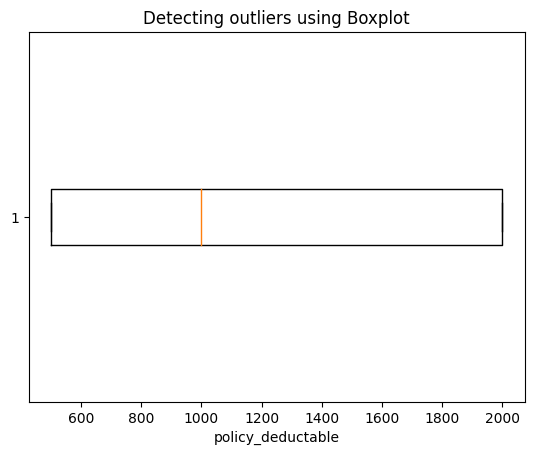

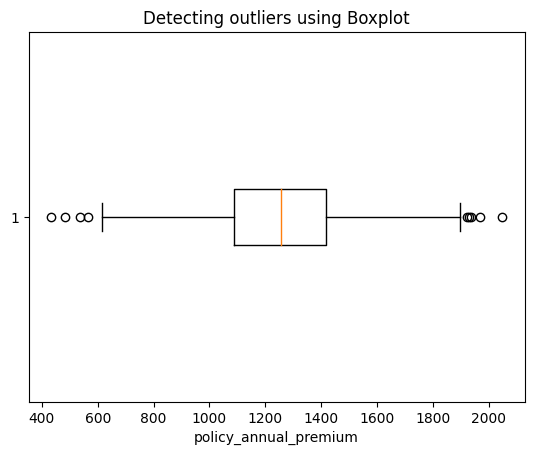

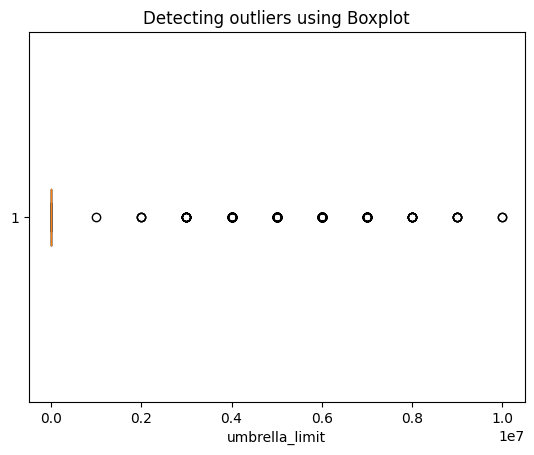

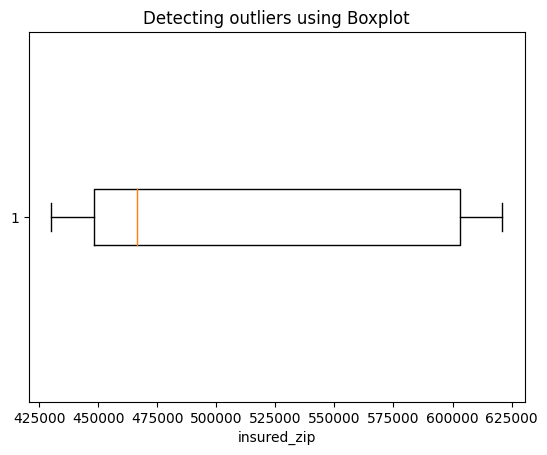

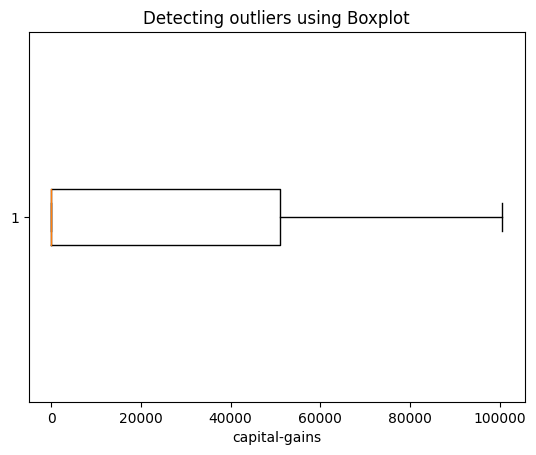

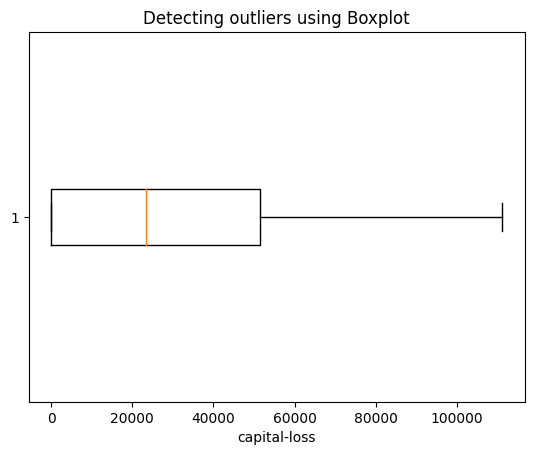

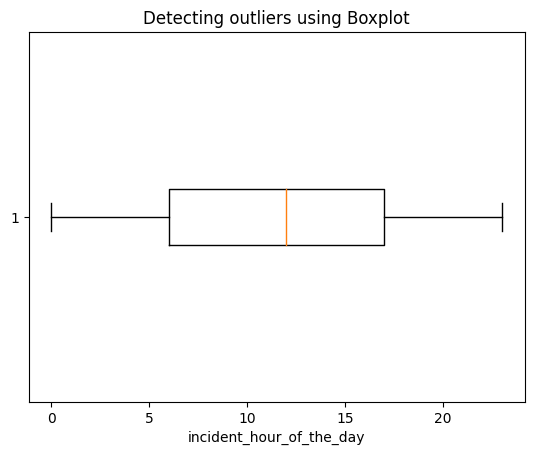

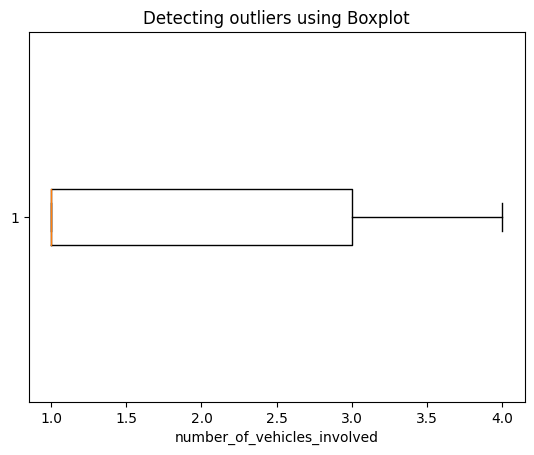

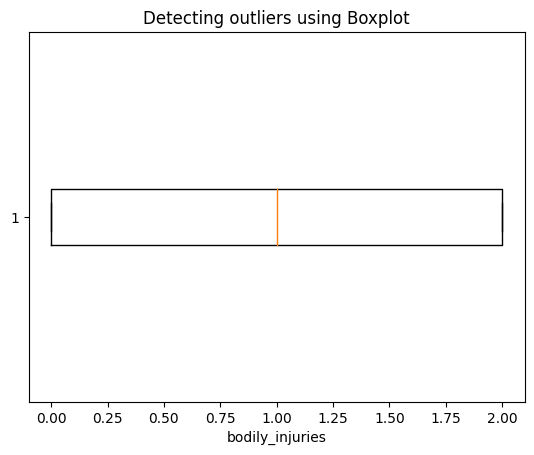

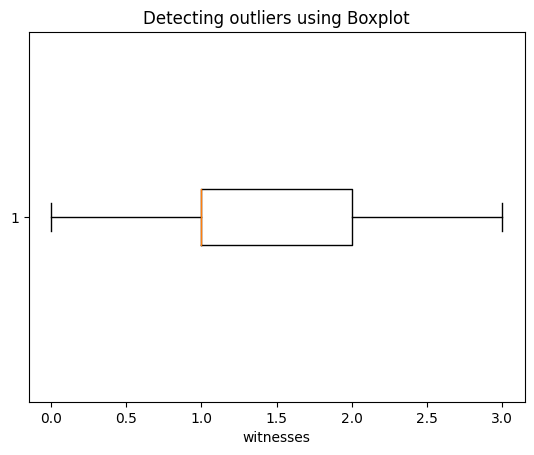

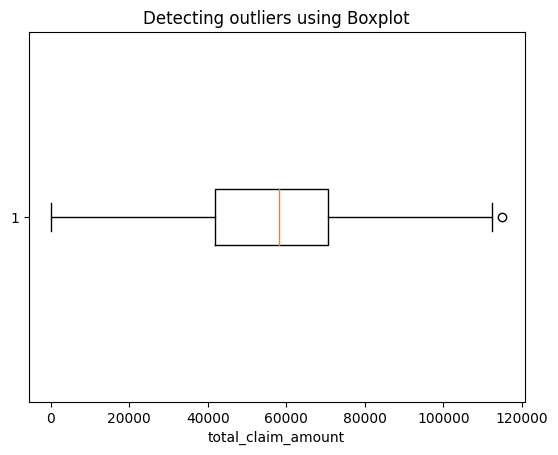

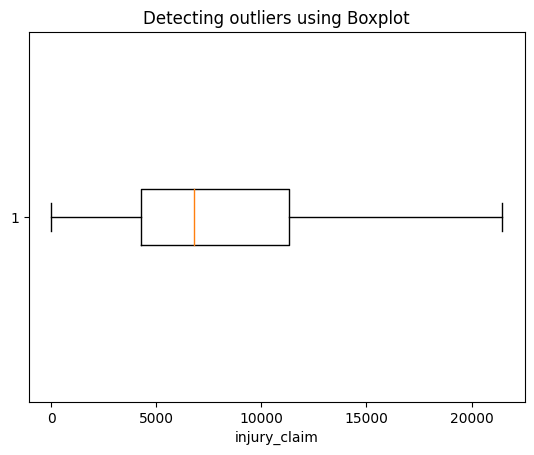

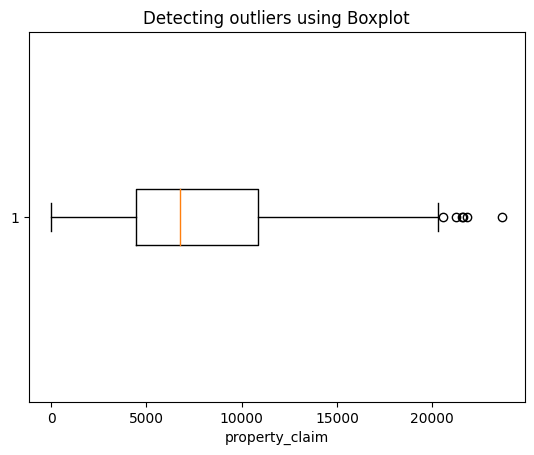

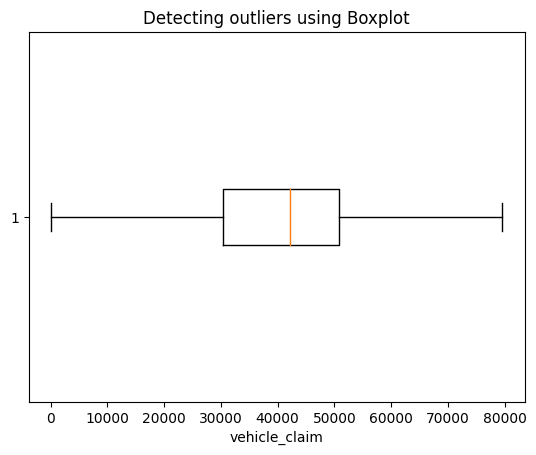

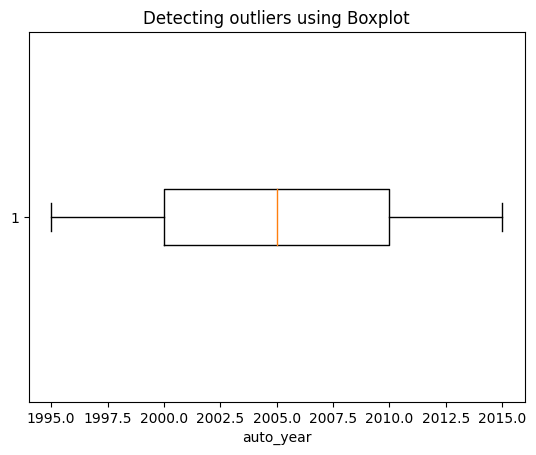

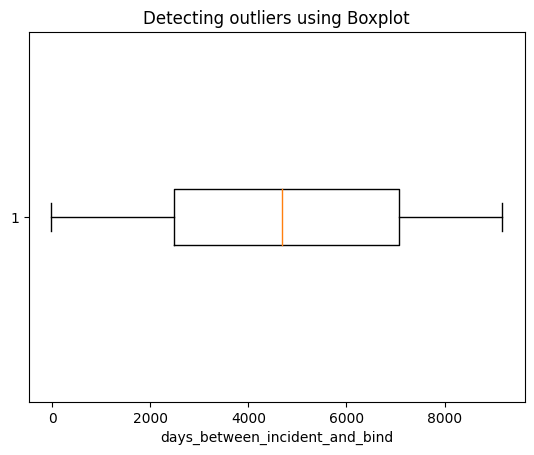

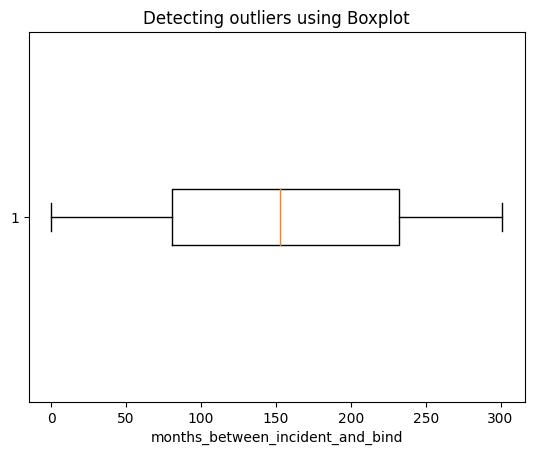

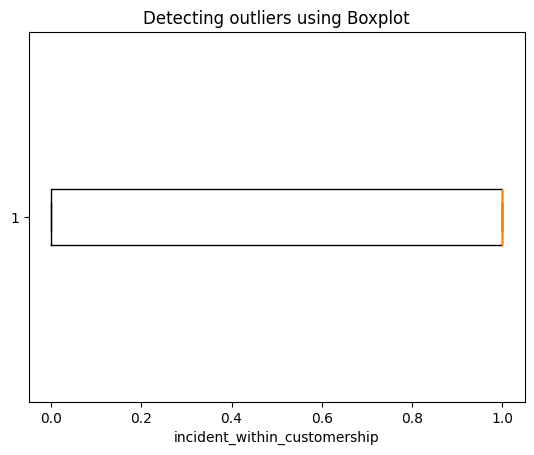

In [100]:
#1. Outlier Handling
#a) Boxplot -> any point lying outside the box it is an outlier
import matplotlib.pyplot as plt
for i in dict(df.dtypes):
  if (dict(df.dtypes) [i] == 'int64' or dict(df.dtypes)[i] ==  'float64'):
    plt.boxplot(df[i],vert=False)#vert=False is to make the plot horizontal plot
    plt.title("Detecting outliers using Boxplot")
    plt.xlabel(i)
    plt.show()

In [101]:
#b) z-score -> By checking points which lie after the 350 are outliers
def detect_outliers_zscore(data): #data is a variable and used as an argument in the
  outliers = [] #empty list
  thres=3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score) > thres:
      outliers.append(i)
  return outliers



In [102]:
for i in dict(df.dtypes):
  outliers=[]
  if (dict(df.dtypes) [i] == 'int64' or dict(df.dtypes)[i] ==  'float64'):
    sample_outliers=detect_outliers_zscore(df[i])
    print("column: ",i)
    print("Outliers from z-scores method: ", sample_outliers)
    if len(sample_outliers)>0:
      median = np.median(df[i])
      for j in sample_outliers:
        df[i] = np.where(df[i]==j,median,df[i])# we replace outliers in each column by median
        print("After treatment: ")
        sample_outliers = detect_outliers_zscore(df[i])
        print("Outliers from Z-scores method: ", sample_outliers)








column:  months_as_customer
Outliers from z-scores method:  []
column:  age
Outliers from z-scores method:  []
column:  policy_deductable
Outliers from z-scores method:  []
column:  policy_annual_premium
Outliers from z-scores method:  [2047.59, 433.33, 484.67]
After treatment: 
Outliers from Z-scores method:  [433.33, 484.67]
After treatment: 
Outliers from Z-scores method:  [484.67]
After treatment: 
Outliers from Z-scores method:  []
column:  umbrella_limit
Outliers from z-scores method:  [8000000, 8000000, 9000000, 10000000, 8000000, 8000000, 8000000, 10000000, 9000000, 8000000, 9000000, 9000000, 8000000, 8000000, 9000000]
After treatment: 
Outliers from Z-scores method:  [9000000.0, 10000000.0, 10000000.0, 9000000.0, 9000000.0, 9000000.0, 9000000.0]
After treatment: 
Outliers from Z-scores method:  [9000000.0, 10000000.0, 10000000.0, 9000000.0, 9000000.0, 9000000.0, 9000000.0]
After treatment: 
Outliers from Z-scores method:  [10000000.0, 10000000.0]
After treatment: 
Outliers fro

In [103]:
#2) Missing values
df.isnull() #for finding missing values


,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,days_between_incident_and_bind,months_between_incident_and_bind,incident_within_customership
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
df.isnull().sum() #authorities_contacted -> 91 (non zero)

,0
months_as_customer,0
age,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0
insured_sex,0


In [105]:
df['authorities_contacted']=df['authorities_contacted'].replace(np.NaN,'None') #replace 91 as 0

In [106]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0
insured_sex,0


In [107]:
#replace ? with
df=df.replace('?',np.NaN)

In [108]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0
insured_sex,0


In [109]:
df.nunique()# used to find no.of unique values

,0
months_as_customer,391
age,46
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,989
umbrella_limit,8
insured_zip,995
insured_sex,2


In [110]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0]) #used to fill missing values with mode

In [111]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [112]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [113]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0
insured_sex,0


In [114]:
#incident_location is unique for everyone
df=df.drop(['incident_location'],axis=1)

##Feature Engineering

In [115]:
df.shape[1]



40

In [116]:
#feature selection -> to eliminate less important features or not important features
#generally we keep 25 to 30 features

In [117]:
#1. Encoding
mappings = {}
for i in dict(df.dtypes):
  if (dict(df.dtypes)[i] == 'O'): #Object or O
    mappings[i] = dict(zip(df[i].unique(),range(len(df[i].unique())))) # zip is used to interlocking from both sides
print(mappings)


{'policy_state': {'OH': 0, 'IN': 1, 'IL': 2}, 'policy_csl': {'250/500': 0, '100/300': 1, '500/1000': 2}, 'insured_sex': {'MALE': 0, 'FEMALE': 1}, 'insured_education_level': {'MD': 0, 'PhD': 1, 'Associate': 2, 'Masters': 3, 'High School': 4, 'College': 5, 'JD': 6}, 'insured_occupation': {'craft-repair': 0, 'machine-op-inspct': 1, 'sales': 2, 'armed-forces': 3, 'tech-support': 4, 'prof-specialty': 5, 'other-service': 6, 'priv-house-serv': 7, 'exec-managerial': 8, 'protective-serv': 9, 'transport-moving': 10, 'handlers-cleaners': 11, 'adm-clerical': 12, 'farming-fishing': 13}, 'insured_hobbies': {'sleeping': 0, 'reading': 1, 'board-games': 2, 'bungie-jumping': 3, 'base-jumping': 4, 'golf': 5, 'camping': 6, 'dancing': 7, 'skydiving': 8, 'movies': 9, 'hiking': 10, 'yachting': 11, 'paintball': 12, 'chess': 13, 'kayaking': 14, 'polo': 15, 'basketball': 16, 'video-games': 17, 'cross-fit': 18, 'exercise': 19}, 'insured_relationship': {'husband': 0, 'other-relative': 1, 'own-child': 2, 'unmarrie

In [118]:
mappings = {}
for i in dict(df.dtypes):
  if (dict(df.dtypes)[i] == 'O'): #Object or O
      mappings[i] = dict(zip(df[i].unique(),range(len(df[i].unique()))))
      df[i] = df[i].map(lambda x: mappings[i][x])

In [119]:
df.dtypes

,0
months_as_customer,int64
age,int64
policy_bind_date,datetime64[ns]
policy_state,int64
policy_csl,int64
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,float64
insured_zip,int64
insured_sex,int64


In [120]:
#Feature Selection
import seaborn as sns
#seaborn is used to handle visualizations

In [121]:
plt.figure(figsize=(18,12))#size
corr = df.corr() #corr -> corelation
print(corr)



                                  months_as_customer       age  \
months_as_customer                          1.000000  0.922098   
age                                         0.922098  1.000000   
policy_bind_date                           -0.048173 -0.036941   
policy_state                                0.000328  0.014533   
policy_csl                                 -0.008876 -0.009876   
policy_deductable                           0.026807  0.029188   
policy_annual_premium                      -0.000399  0.007703   
umbrella_limit                              0.021358  0.014769   
insured_zip                                 0.017895  0.025604   
insured_sex                                -0.060925 -0.073337   
insured_education_level                    -0.074839 -0.076016   
insured_occupation                          0.004261  0.006836   
insured_hobbies                            -0.019333 -0.011810   
insured_relationship                        0.033866  0.057341   
capital-ga

<Figure size 1800x1200 with 0 Axes>

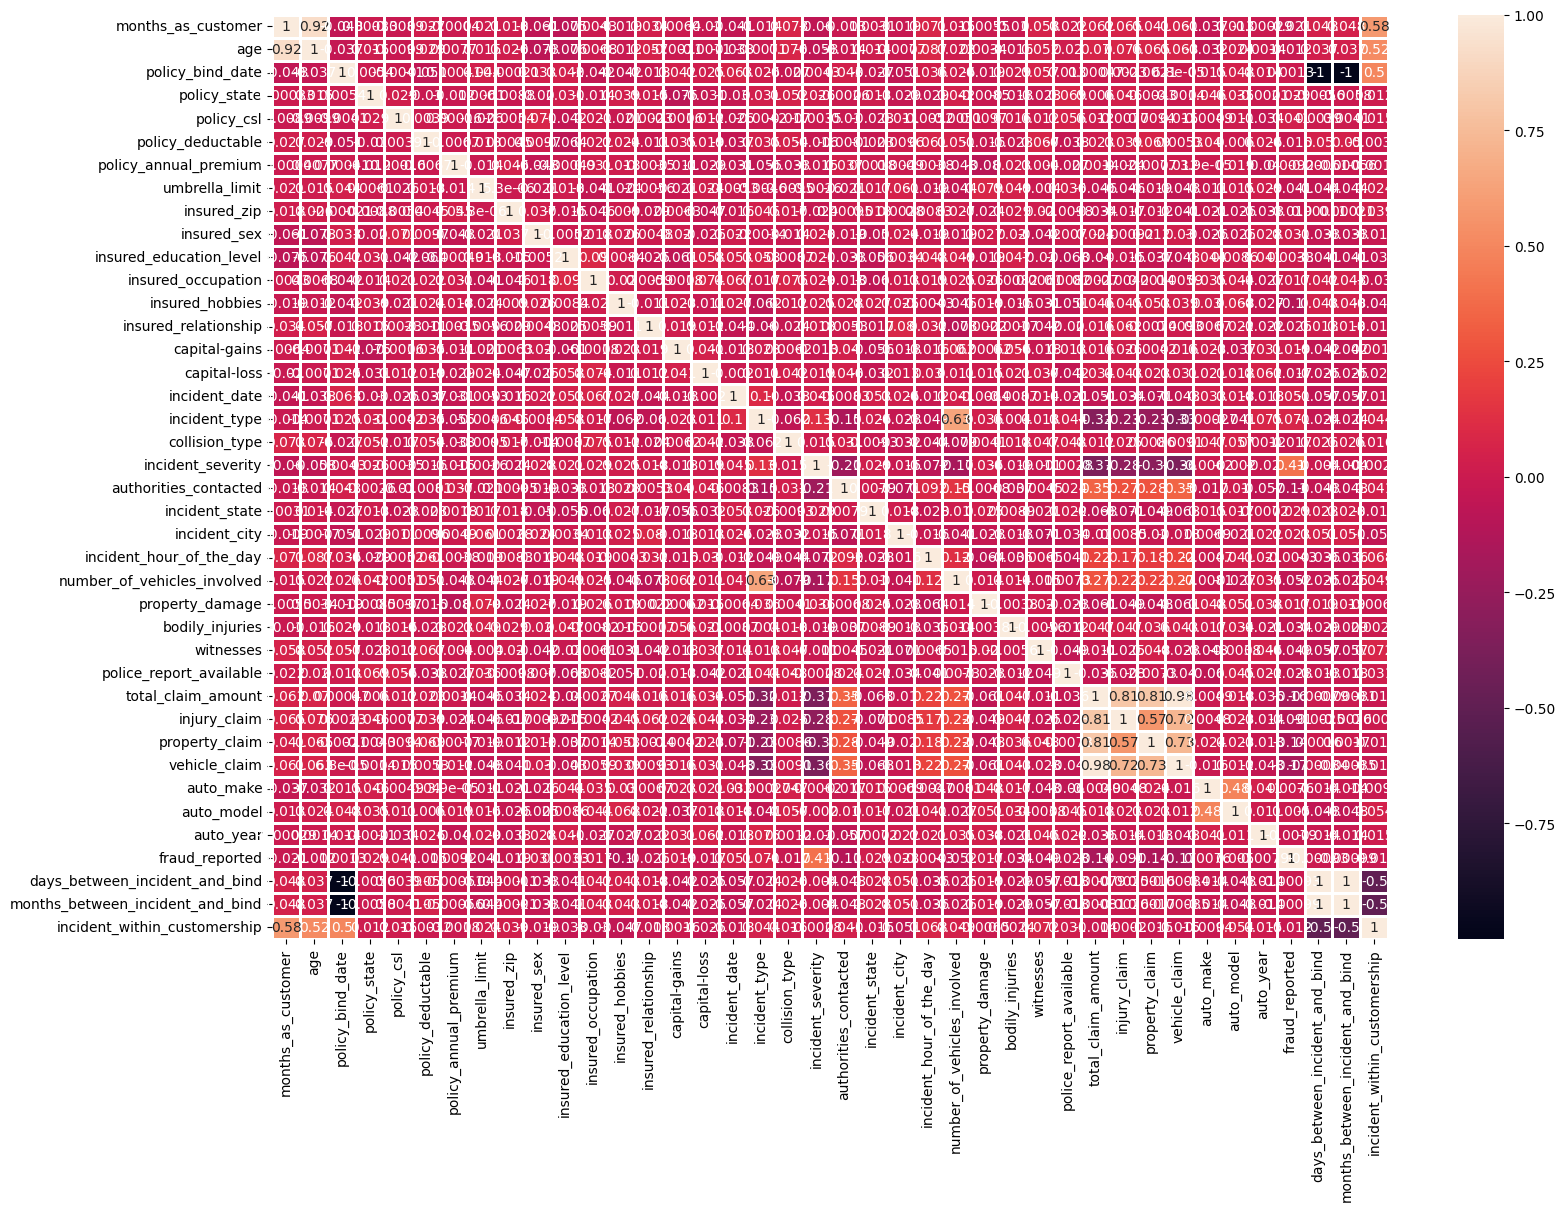

In [122]:
plt.figure(figsize = (18, 12))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [123]:
df=df.drop('vehicle_claim',axis=1)

In [124]:
df=df.drop(['policy_bind_date','incident_date'],axis=1)

In [125]:
df.shape[1]

37

##Feature Importances

In [126]:
#Here we take a dummy model(Extra Trees Classifier Model)
#scikit-learn library -> machine learning models
from sklearn.ensemble import ExtraTreesClassifier
y=df['fraud_reported']
x=df.drop(['fraud_reported'],axis=1)
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)#we remove least important features(we will remove last features)

[0.02451809 0.0248885  0.02219671 0.0218608  0.02183785 0.02541804
 0.01886709 0.02831953 0.0177033  0.0267237  0.02731197 0.03891304
 0.02381876 0.02190299 0.02221353 0.01606162 0.02118384 0.17754588
 0.0240385  0.02452199 0.02350808 0.02548544 0.01629522 0.01578992
 0.0223765  0.02317007 0.01516473 0.03021416 0.0271635  0.03113693
 0.02435837 0.024939   0.02695123 0.02301296 0.02376463 0.01682351]


In [127]:
#Finding 10 most important features
feature_importances = pd.Series(model.feature_importances_,index=x.columns)
print(feature_importances)

months_as_customer                  0.024518
age                                 0.024889
policy_state                        0.022197
policy_csl                          0.021861
policy_deductable                   0.021838
policy_annual_premium               0.025418
umbrella_limit                      0.018867
insured_zip                         0.028320
insured_sex                         0.017703
insured_education_level             0.026724
insured_occupation                  0.027312
insured_hobbies                     0.038913
insured_relationship                0.023819
capital-gains                       0.021903
capital-loss                        0.022214
incident_type                       0.016062
collision_type                      0.021184
incident_severity                   0.177546
authorities_contacted               0.024038
incident_state                      0.024522
incident_city                       0.023508
incident_hour_of_the_day            0.025485
number_of_

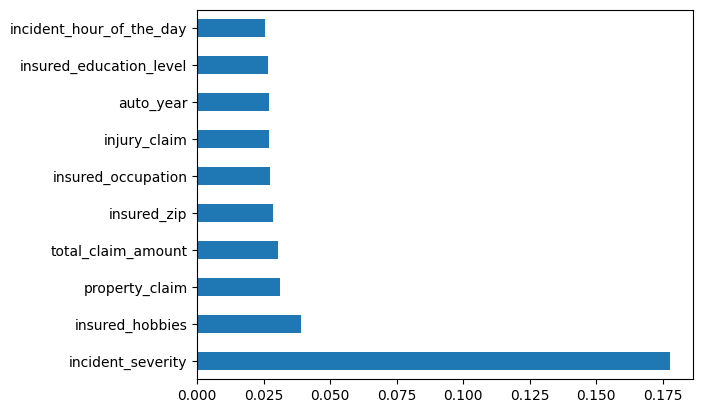

In [128]:
feature_importances.nlargest(10).plot(kind='barh')#barh->bar horizantal for 10 imp features
plt.show()

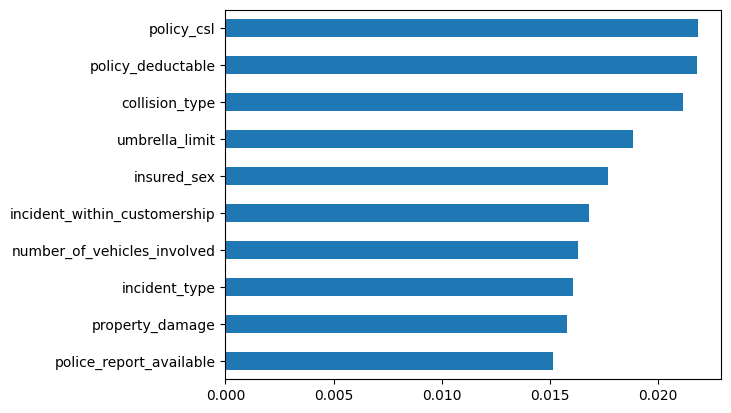

In [129]:
#Finding 10 least important features
feature_importances.nsmallest(10).plot(kind='barh')
plt.show()

In [130]:
#removing least important columns with importance < 0.02
df = df.drop(['property_damage','insured_sex','number_of_vehicles_involved','incident_type','police_report_available','incident_within_customership'],axis=1)

In [131]:
df.shape

(1000, 31)

In [132]:
df#analytical dataset

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,...,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,days_between_incident_and_bind,months_between_incident_and_bind
0,328,48,0,0,1000,1406.91,0.0,466132,0,0,...,2,71610,6510,13020.0,0,0,2004,0,100,3
1,228,42,1,0,2000,1197.22,5000000.0,468176,0,1,...,0,5070,780,780.0,1,1,2007,0,3130,102
2,134,29,0,1,2000,1413.14,5000000.0,430632,1,2,...,3,34650,7700,3850.0,2,2,2007,1,5282,173
3,256,41,2,0,2000,1415.74,6000000.0,608117,1,3,...,2,63400,6340,6340.0,3,3,2014,0,8996,295
4,228,44,2,2,1000,1583.91,6000000.0,610706,2,2,...,1,6500,1300,650.0,4,4,2009,1,256,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,2,1000,1310.80,0.0,431289,3,0,...,1,87200,17440,8720.0,12,31,2006,1,8622,283
996,285,41,2,1,1000,1436.79,0.0,608177,1,5,...,3,108480,18080,18080.0,13,27,2015,1,384,12
997,130,34,0,0,500,1383.49,3000000.0,442797,3,3,...,3,67500,7500,7500.0,9,17,1996,1,4358,143
998,458,62,2,2,2000,1356.92,5000000.0,441714,2,11,...,1,46980,5220,5220.0,6,7,1998,1,1196,39


##Model Training

In [133]:
#Explanatory model building
from sklearn.model_selection import train_test_split
y=df['fraud_reported']
x=df.drop('fraud_reported',axis=1)

In [134]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,days_between_incident_and_bind,months_between_incident_and_bind
0,328,48,0,0,1000,1406.91,0.0,466132,0,0,...,1,2,71610,6510,13020.0,0,0,2004,100,3
1,228,42,1,0,2000,1197.22,5000000.0,468176,0,1,...,0,0,5070,780,780.0,1,1,2007,3130,102
2,134,29,0,1,2000,1413.14,5000000.0,430632,1,2,...,2,3,34650,7700,3850.0,2,2,2007,5282,173
3,256,41,2,0,2000,1415.74,6000000.0,608117,1,3,...,1,2,63400,6340,6340.0,3,3,2014,8996,295
4,228,44,2,2,1000,1583.91,6000000.0,610706,2,2,...,0,1,6500,1300,650.0,4,4,2009,256,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,2,1000,1310.80,0.0,431289,3,0,...,0,1,87200,17440,8720.0,12,31,2006,8622,283
996,285,41,2,1,1000,1436.79,0.0,608177,1,5,...,2,3,108480,18080,18080.0,13,27,2015,384,12
997,130,34,0,0,500,1383.49,3000000.0,442797,3,3,...,2,3,67500,7500,7500.0,9,17,1996,4358,143
998,458,62,2,2,2000,1356.92,5000000.0,441714,2,11,...,0,1,46980,5220,5220.0,6,7,1998,1196,39


In [135]:
y

,fraud_reported
0,0
1,0
2,1
3,0
4,1
...,...
995,1
996,1
997,1
998,1


In [136]:
#Checking the performance
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x,y,test_size=0.2)

In [137]:
X_Train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,days_between_incident_and_bind,months_between_incident_and_bind
354,77,27,1,2,2000,966.26,0.0,471704,4,12,...,0,0,67200,6720,6720.0,13,27,1995,5784,190
424,150,31,1,2,1000,1354.50,0.0,456602,3,1,...,0,3,64800,6480,12960.0,9,18,2000,7401,243
560,294,49,1,2,500,1135.43,0.0,442604,3,13,...,1,1,42900,3900,3900.0,3,33,2010,6949,228
11,447,61,0,1,2000,1137.16,0.0,615561,4,8,...,1,2,114920,17680,17680.0,6,10,2006,5741,188
585,180,35,2,2,1000,1252.48,0.0,432148,0,1,...,1,3,5100,1020,510.0,3,33,2000,3495,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,85,30,1,2,1000,1454.42,0.0,459588,2,9,...,0,1,74280,12380,12380.0,9,18,2006,7764,255
934,146,31,0,1,1000,1457.65,5000000.0,606219,5,3,...,1,3,52380,5820,5820.0,7,11,2010,8901,292
565,392,50,0,1,2000,1108.97,0.0,431496,1,8,...,2,2,108030,16620,16620.0,0,0,2002,8546,280
10,235,42,0,1,500,1253.12,4000000.0,462283,3,8,...,2,2,87010,7910,15820.0,8,9,2002,4608,151


In [138]:
Y_Train

,fraud_reported
354,1
424,0
560,1
11,1
585,1
...,...
319,0
934,1
565,1
10,1


In [139]:
X_Test

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,days_between_incident_and_bind,months_between_incident_and_bind
494,338,47,0,0,2000,1486.04,0.0,615688,2,3,...,2,3,64100,12820,6410.0,2,2,2014,2546,83
176,155,34,1,1,500,1706.79,0.0,462479,3,9,...,1,1,77040,8560,8560.0,12,26,1998,8868,291
520,280,43,1,1,1000,1559.34,0.0,448912,6,10,...,0,2,77000,14000,7000.0,4,4,2004,938,30
34,149,37,2,2,500,1415.68,0.0,603381,1,5,...,0,1,64800,10800,5400.0,6,10,1999,8796,288
695,289,45,0,0,2000,1221.41,0.0,466289,3,13,...,2,1,2700,300,300.0,12,31,2006,5601,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,137,31,0,0,2000,1340.43,0.0,441175,4,8,...,1,2,50800,10160,10160.0,4,13,2005,7435,244
275,243,43,1,2,500,1307.74,0.0,466137,2,1,...,0,1,37530,4170,4170.0,11,23,2008,3281,107
900,1,33,0,0,2000,1391.63,0.0,466390,2,2,...,0,3,69400,6940,6940.0,1,22,2000,7022,230
324,97,26,2,0,1000,1252.08,0.0,465456,5,8,...,2,2,50400,10080,5040.0,12,29,2000,8497,279


In [140]:
Y_Test

,fraud_reported
494,0
176,1
520,1
34,1
695,1
...,...
80,1
275,1
900,1
324,0


In [141]:
#ML models
# 1.Logistic Regression
from sklearn.linear_model import LogisticRegression #Model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score #Performance matrix

model = LogisticRegression()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test) #compare with y-test these x-test predictions

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.715

Classification report:
                precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.71      1.00      0.83       143

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.60       200


Confusion matrix:
  [[  0  57]
 [  0 143]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [142]:
# 2.K Nearest Neighbours(KNN approach)
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test)

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.69

Classification report:
                precision    recall  f1-score   support

           0       0.38      0.14      0.21        57
           1       0.73      0.91      0.81       143

    accuracy                           0.69       200
   macro avg       0.55      0.52      0.51       200
weighted avg       0.63      0.69      0.64       200


Confusion matrix:
  [[  8  49]
 [ 13 130]]


In [143]:
# 3.GaussianNB Classifier model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test)

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.71

Classification report:
                precision    recall  f1-score   support

           0       0.33      0.02      0.03        57
           1       0.72      0.99      0.83       143

    accuracy                           0.71       200
   macro avg       0.52      0.50      0.43       200
weighted avg       0.61      0.71      0.60       200


Confusion matrix:
  [[  1  56]
 [  2 141]]


In [144]:
# 4.Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test)

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.815

Classification report:
                precision    recall  f1-score   support

           0       0.67      0.68      0.68        57
           1       0.87      0.87      0.87       143

    accuracy                           0.81       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.82      0.81      0.82       200


Confusion matrix:
  [[ 39  18]
 [ 19 124]]


In [145]:
# 5.Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test)

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.715

Classification report:
                precision    recall  f1-score   support

           0       0.50      0.14      0.22        57
           1       0.73      0.94      0.83       143

    accuracy                           0.71       200
   macro avg       0.62      0.54      0.52       200
weighted avg       0.67      0.71      0.65       200


Confusion matrix:
  [[  8  49]
 [  8 135]]


In [146]:
# 6.XGB Classifier model
from xgboost import XGBClassifier #extreme gradient boosting

model = XGBClassifier()
model = model.fit(X_Train,Y_Train)
pred = model.predict(X_Test)

print('Accuracy: ',accuracy_score(Y_Test,pred))
print('\nClassification report:\n ',classification_report(Y_Test,pred))
print('\nConfusion matrix:\n ',confusion_matrix(Y_Test,pred))

Accuracy:  0.81

Classification report:
                precision    recall  f1-score   support

           0       0.71      0.56      0.63        57
           1       0.84      0.91      0.87       143

    accuracy                           0.81       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.80      0.81      0.80       200


Confusion matrix:
  [[ 32  25]
 [ 13 130]]
